In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

In [2]:
genes_data = pd.read_csv('../data/all_genes_analysis.tsv', 
                         sep='\t').sort_values(by='AC/N_range', ascending=False) 
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,3,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,3,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,3,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


In [3]:
range_values = genes_data['AC/N_range']

q1 = np.percentile(range_values, 33.33)
median = np.percentile(range_values, 66.67)
q3 = np.percentile(range_values, 100)

print(q1, median, q3)

1.5435999039562631 3.811976470588236 486889.8000000001


In [4]:
# Для разделения по range
def define_group_range(range):
    if range <= q1 and range > 1: # все транскрипты очень похожи (AC/N и маленькие, и большие), AC > N
        return 0
    elif range >= q3: # очень большой разброс в гене по наличию AC и N у lof-вариантов в разных транскриптах. Либо мало транскриптов, при этом AC>>N
        return 3
    elif range < 1:
        return 2      # мало транскриптов, у всех N > AC
    else:
        return 1 # все транскрипты гена какие-то, AC > N для каждого транскрипта

# Для разделения по loeuf по рекомендациям gnomad
def define_group_loeuf(range):
    if range == None:
        return None
    if range < 0.35:
        return 0
    elif range > 0.75:
        return 2
    else:
        return 1

In [5]:
genes_data['range_group_custom'] = genes_data['AC/N_range'].apply(define_group_range)
genes_data['range_group_custom'] = genes_data['range_group_custom'].astype('category')

genes_data['range_group_loeuf'] = genes_data['LOEUF'].apply(define_group_loeuf)
genes_data['range_group_loeuf'] = genes_data['range_group_loeuf'].astype('category')
genes_data

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.200000,486889.800000,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.500000,217877.625000,0.276,1.2600,1,0
17988,KRTAP19-6,104120.000000,104120.000000,104120.000000,NaN,0.0000,1,1
14606,FTSJ3,0.714286,70413.363636,98578.709091,0.412,0.2500,1,1
14607,ALDH3A2,0.642202,52503.437500,81755.352679,0.825,3.7125,1,2
...,...,...,...,...,...,...,...,...
12271,ANKRD52,0.185185,0.185185,0.185185,0.090,17.4000,2,0
7814,ENSG00000288634,0.136364,0.136364,0.136364,NaN,NaN,2,1
17451,MBD3L4,0.125000,0.125000,0.125000,1.885,0.0000,2,2
9962,SMNDC1,0.122951,0.122951,0.122951,0.529,8.4200,2,1


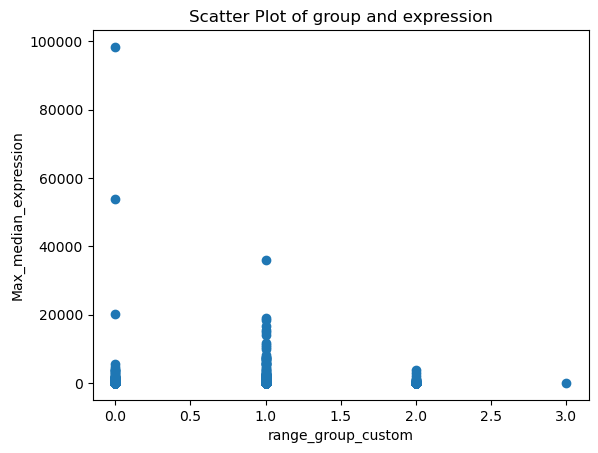

In [6]:
plt.scatter(genes_data['range_group_custom'], genes_data['Max_median_expression'])
plt.xlabel('range_group_custom')
plt.ylabel('Max_median_expression')
plt.title('Scatter Plot of group and expression')
plt.show()

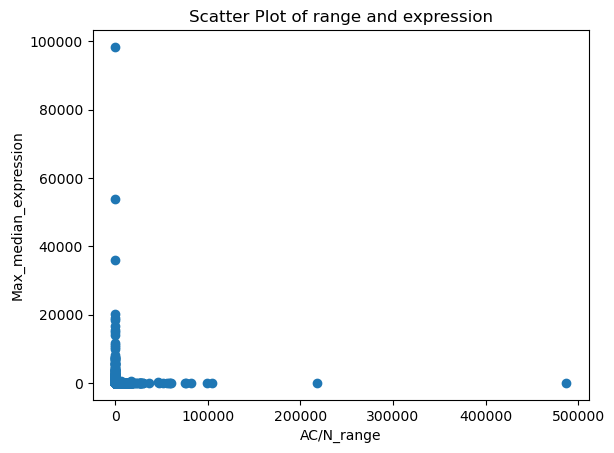

In [7]:
plt.scatter(genes_data['AC/N_range'], genes_data['Max_median_expression'])
plt.xlabel('AC/N_range')
plt.ylabel('Max_median_expression')
plt.title('Scatter Plot of range and expression')
plt.show()

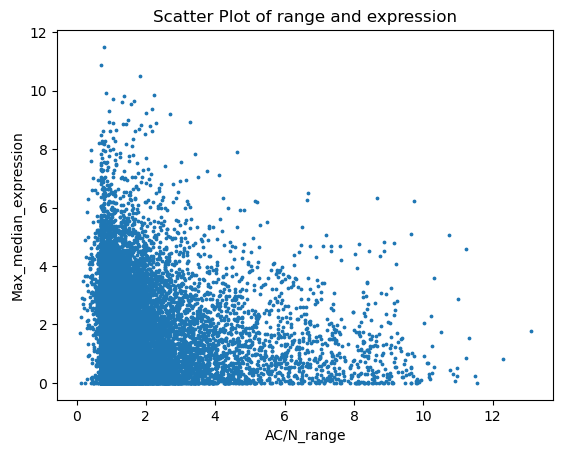

In [8]:
plt.scatter(np.log1p(genes_data['AC/N_range']), np.log1p(genes_data['Max_median_expression']), s=3)
plt.xlabel('AC/N_range')
plt.ylabel('Max_median_expression')
plt.title('Scatter Plot of range and expression')
plt.show()

In [9]:
filtered_genes = genes_data.loc[
    (np.log1p(genes_data['AC/N_range']) >= 6) &
    (np.log1p(genes_data['Max_median_expression']) >= 1.5) &
    (genes_data['range_group_loeuf'] != 2)]

filtered_genes.sort_values(by='Max_median_expression', ascending=False)

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
5877,HLA-DRA,1.758621,29322.275862,16673.450980,0.594,510.54,1,1
8485,NPDC1,1.069767,7535.253333,7043.823768,0.736,121.60,1,1
5906,MTCH1,1.493976,979.125000,655.382056,0.439,110.63,1,1
14636,RPL23A,1.333333,1626.000000,1219.500000,0.393,105.78,1,1
12272,TPT1,1.000000,76186.454545,76186.454545,0.485,97.10,1,1
...,...,...,...,...,...,...,...,...
2024,MEMO1,1.636364,746.650000,456.286111,0.242,3.86,1,0
18217,HPS4,3.222222,2179.750000,676.474138,0.633,3.73,1,1
8493,PCSK5,0.445055,753.263056,1692.516990,0.499,3.68,1,1
2010,ANKRD36C,1.000000,1665.032609,1665.032609,NaN,3.51,1,1


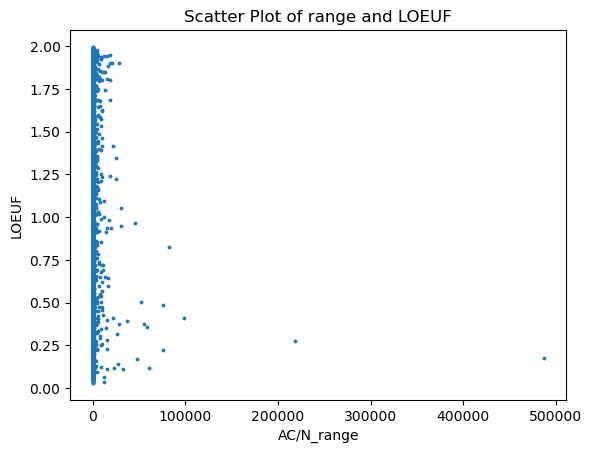

In [10]:
plt.scatter(genes_data['AC/N_range'], genes_data['LOEUF'], s=3)
plt.xlabel('AC/N_range')
plt.ylabel('LOEUF')
plt.title('Scatter Plot of range and LOEUF')
plt.show()

In [11]:
genes_data.loc[
    (genes_data['AC/N_range'] >= 200000) &
    (genes_data['LOEUF'] <= 0.5)].sort_values(by='Max_median_expression', ascending=False)

,Gene_name,AC/N_min,AC/N_max,AC/N_range,LOEUF,Max_median_expression,range_group_custom,range_group_loeuf
1992,CFLAR,0.037736,18373.2,486889.800,0.173,4.9175,3,0
5012,ARHGAP26,0.444444,96834.5,217877.625,0.276,1.2600,1,0


### **CFLAR** CASP8 and FADD like apoptosis regulator

Ensembl canonical transcript - **ENST00000309955.8**

In [12]:
gene_data = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/CFLAR.tsv', 
                         sep='\t')
gene_data = gene_data[
    (gene_data['Feature_Type'] == 'Transcript') & 
    (gene_data['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data = gene_data[gene_data['Consequence'].isin(values_to_filter)]
gene_data = gene_data[gene_data['Feature'].str.contains('ENST')]
gene_data

/tmp/ipykernel_2700345/1291534235.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_data = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/CFLAR.tsv',


,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
14434,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/10,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.131670131670132
14435,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/6,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.285285285285285
14436,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/8,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.142002989536622
14437,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/9,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.216154721274175
14438,chr2,201130055,rs1400059130,C,T,1,0,0,0,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.252324037184595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309332,chr2,201163955,NaN,T,TA,1,0,0,0,0,...,protein_coding,9/9,NaN,1,insertion,NaN,HC,NaN,NaN,PERCENTILE:0.985281385281385
309757,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,10/10,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.997920997920998
309758,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,8/8,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.997757847533632
309759,chr2,201163969,NaN,CA,C,2,0,0,2,0,...,protein_coding,10/10,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.997920997920998


In [13]:
sum_ac_per_transcript = gene_data.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})

In [14]:
transcripts_df_ac['AC/Variant'] = transcripts_df_ac['AC']/transcripts_df_ac['Variant']
transcripts_df_ac

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000309955,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202
1,ENST00000341222,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176
2,ENST00000341582,30,0,0,23,0,2,0,1,1,CFLAR,ENSG00000003402,82,0.365854
3,ENST00000342795,29,0,0,23,0,3,1,1,1,CFLAR,ENSG00000003402,78,0.371795
4,ENST00000395148,417,0,2,382,1,13,1,1,1,CFLAR,ENSG00000003402,72,5.791667
5,ENST00000417748,2,0,0,0,0,0,0,1,1,CFLAR,ENSG00000003402,53,0.037736
6,ENST00000423241,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202
7,ENST00000433445,1,0,0,0,0,0,0,0,1,CFLAR,ENSG00000003402,1,1.000000
8,ENST00000440180,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176
9,ENST00000441224,4,0,0,1,0,1,0,1,1,CFLAR,ENSG00000003402,54,0.074074


Транскрипты канонический и следующий неканонический отличаются размером белка. Второй в два раза меньше

### Добавим информацию о LOEUF для каждого транскрипта и сравним с имеющимися данными

In [15]:
constraint_transcript = pd.read_csv('/home/bioinf/gnomad-variants/raw_data/plof_metrics/gnomad.v4.1.constraint_metrics.tsv', sep='\t')

In [16]:
columns_to_keep = ['gene', 'gene_id', 'transcript', 'canonical', 'lof.oe_ci.upper']
constraint_transcript_loeuf = constraint_transcript[columns_to_keep]
constraint_transcript_loeuf

,gene,gene_id,transcript,canonical,lof.oe_ci.upper
0,A1BG,1,NM_130786.4,True,1.340
1,A1BG,ENSG00000121410,ENST00000263100,True,1.340
2,A1BG,ENSG00000121410,ENST00000600966,False,1.256
3,A1CF,29974,NM_001198818.2,False,0.825
4,A1CF,29974,NM_001198819.2,False,0.853
...,...,...,...,...,...
211518,NaN,ENSG00000289346,ENST00000625377,True,0.871
211519,NaN,ENSG00000289503,ENST00000553426,True,NaN
211520,NaN,ENSG00000289517,ENST00000617178,True,NaN
211521,NaN,ENSG00000289565,ENST00000632040,True,NaN


In [18]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript
0,ENST00000309955,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202,0.397
1,ENST00000341222,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176,0.803
2,ENST00000341582,30,0,0,23,0,2,0,1,1,CFLAR,ENSG00000003402,82,0.365854,0.397
3,ENST00000342795,29,0,0,23,0,3,1,1,1,CFLAR,ENSG00000003402,78,0.371795,0.728
4,ENST00000395148,417,0,2,382,1,13,1,1,1,CFLAR,ENSG00000003402,72,5.791667,0.846
5,ENST00000417748,2,0,0,0,0,0,0,1,1,CFLAR,ENSG00000003402,53,0.037736,0.965
6,ENST00000423241,39,0,0,31,0,2,1,1,1,CFLAR,ENSG00000003402,89,0.438202,0.397
7,ENST00000433445,1,0,0,0,0,0,0,0,1,CFLAR,ENSG00000003402,1,1.000000,1.703
8,ENST00000440180,275600,13548,4675,218623,6601,10520,774,1144,7972,CFLAR,ENSG00000003402,68,4052.941176,0.803
9,ENST00000441224,4,0,0,1,0,1,0,1,1,CFLAR,ENSG00000003402,54,0.074074,0.996


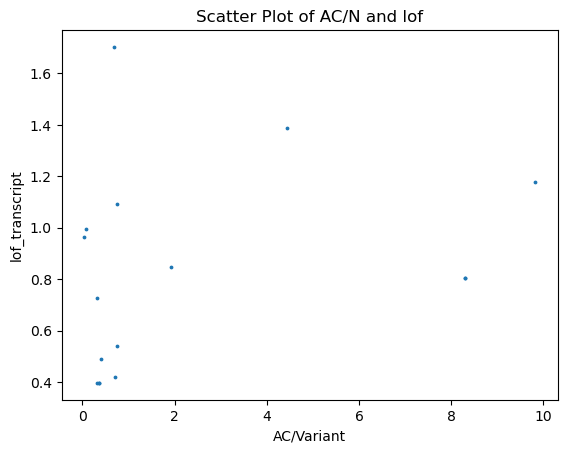

In [26]:
plt.scatter(np.log1p(transcripts_df_ac['AC/Variant']), transcripts_df_ac['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()

In [19]:
gene_data_HLADRA = pd.read_csv('/home/bioinf/gnomad-variants/Grishchenko/processed_data/tables/ac_expression_tables/HLA-DRA.tsv', 
                         sep='\t')
gene_data_HLADRA = gene_data_HLADRA[
    (gene_data_HLADRA['Feature_Type'] == 'Transcript') & 
    (gene_data_HLADRA['BIOTYPE'] == 'protein_coding') ]

values_to_filter = ['stop_gained', 'frameshift_variant', 'splice_donor_variant', 'splice_acceptor_variant']

gene_data_HLADRA = gene_data_HLADRA[gene_data_HLADRA['Consequence'].isin(values_to_filter)]
gene_data_HLADRA = gene_data_HLADRA[gene_data_HLADRA['Feature'].str.contains('ENST')]
gene_data_HLADRA

,CHROM,POS,ID,REF,ALT,AC,AC_afr,AC_amr,AC_nfe,AC_asj,...,BIOTYPE,EXON,INTRON,ALLELE_NUM,VARIANT_CLASS,CANONICAL,LoF,LoF_filter,LoF_flags,LoF_info
507,chr6,32439991,NaN,TAGCTGTGCTGATG,T,1,0,0,1,0,...,protein_coding,1/5,NaN,1,deletion,NaN,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.0826086956521739
508,chr6,32439991,NaN,TAGCTGTGCTGATG,T,1,0,0,1,0,...,protein_coding,1/5,NaN,1,deletion,YES,HC,NaN,PHYLOCSF_WEAK,PERCENTILE:0.0745098039215686
1140,chr6,32442453,NaN,CAT,C,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.130434782608696
1141,chr6,32442453,NaN,CAT,C,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.117647058823529
1155,chr6,32442467,NaN,GGCCGA,G,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,NaN,HC,NaN,NaN,PERCENTILE:0.156521739130435
1156,chr6,32442467,NaN,GGCCGA,G,1,0,0,1,0,...,protein_coding,2/5,NaN,1,deletion,YES,HC,NaN,NaN,PERCENTILE:0.141176470588235
1338,chr6,32442588,rs754420534,C,T,23,0,0,23,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.323188405797101
1339,chr6,32442588,rs754420534,C,T,23,0,0,23,0,...,protein_coding,2/5,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.291503267973856
1359,chr6,32442609,NaN,C,T,2,0,0,1,0,...,protein_coding,2/5,NaN,1,SNV,NaN,HC,NaN,NaN,PERCENTILE:0.353623188405797
1360,chr6,32442609,NaN,C,T,2,0,0,1,0,...,protein_coding,2/5,NaN,1,SNV,YES,HC,NaN,NaN,PERCENTILE:0.318954248366013


In [28]:
sum_ac_per_transcript = gene_data_HLADRA.groupby('Feature')['AC']

transcript_list = []

for key, group in sum_ac_per_transcript:
    transcript_list.append(key)
sum_ac_per_transcript = gene_data_HLADRA.groupby('Feature')['AC']

sum_ac = []

for key, group in sum_ac_per_transcript:
    unique_values = group.sum()  # Extract the unique values
    sum_ac.append(unique_values)

population_ac = ['AC_afr', 'AC_amr', 'AC_nfe', 'AC_asj', 'AC_sas', 'AC_eas', 'AC_mid', 'AC_fin']

sum_population_ac = [[], [], [], [], [], [], [], []]


for idx, el in enumerate(population_ac):
    sum_population = []
    sum_AC_per_transcript = gene_data_HLADRA.groupby('Feature')[el]
    for key, group in sum_AC_per_transcript:
        unique_values = group.sum()
        sum_population.append(unique_values)
        sum_population_ac[idx].append(sum(sum_population))
        sum_population = []

gene_name_per_transcript = gene_data_HLADRA.groupby('Feature')['SYMBOL']
gene_names = []

for key, group in gene_name_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_names.extend(unique_values)

gene_id_per_transcript = gene_data_HLADRA.groupby('Feature')['Gene']

gene_id = []

for key, group in gene_id_per_transcript:
    unique_values = group.unique()  # Extract the unique values
    gene_id.extend(unique_values)

alt_per_transcript = gene_data_HLADRA.groupby('Feature')['ALT']

alt_sum = []

for key, group in alt_per_transcript:
    unique_values = len(group.sum())
    alt_sum.append(unique_values)

transcripts_df_ac_HLADRA = pd.DataFrame({
    'Transcript_ID': transcript_list,
    'AC': sum_ac,
    'AC_afr': sum_population_ac[0],
    'AC_amr': sum_population_ac[1],
    'AC_nfe': sum_population_ac[2],
    'AC_asj': sum_population_ac[3],
    'AC_sas': sum_population_ac[4],
    'AC_eas': sum_population_ac[5],
    'AC_mid': sum_population_ac[6],
    'AC_fin': sum_population_ac[7],
    'Gene_name': gene_names,
    'Gene_id': gene_id,
    'Variant': alt_sum
})
transcripts_df_ac_HLADRA['AC/Variant'] = transcripts_df_ac_HLADRA['AC']/transcripts_df_ac_HLADRA['Variant']
transcripts_df_ac_HLADRA

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant
0,ENST00000374982,850346,19627,27855,629882,18800,61821,26047,4213,26550,HLA-DRA,ENSG00000204287,29,29322.275862
1,ENST00000395388,51,0,0,48,0,2,1,0,0,HLA-DRA,ENSG00000204287,29,1.758621


In [29]:
matched_values = constraint_transcript_loeuf[constraint_transcript_loeuf['transcript'].isin(transcripts_df_ac_HLADRA['Transcript_ID'])]
matched_values.reset_index(inplace=True)
transcripts_df_ac_HLADRA['lof_transcript'] = matched_values['lof.oe_ci.upper']
transcripts_df_ac_HLADRA

,Transcript_ID,AC,AC_afr,AC_amr,AC_nfe,AC_asj,AC_sas,AC_eas,AC_mid,AC_fin,Gene_name,Gene_id,Variant,AC/Variant,lof_transcript
0,ENST00000374982,850346,19627,27855,629882,18800,61821,26047,4213,26550,HLA-DRA,ENSG00000204287,29,29322.275862,0.713
1,ENST00000395388,51,0,0,48,0,2,1,0,0,HLA-DRA,ENSG00000204287,29,1.758621,0.631


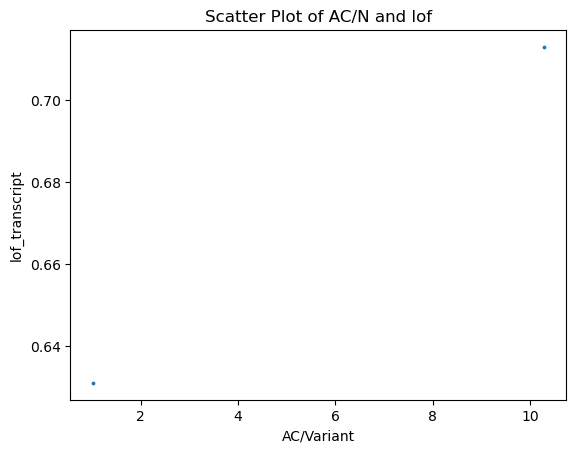

In [30]:
plt.scatter(np.log1p(transcripts_df_ac_HLADRA['AC/Variant']), transcripts_df_ac_HLADRA['lof_transcript'], s=3)
plt.xlabel('AC/Variant')
plt.ylabel('lof_transcript')
plt.title('Scatter Plot of AC/N and lof')
plt.show()